Generated RDD of 10000 examples sampled from the standard normal distribution
  First 5 samples:
    -0.545833251
    1.07689056928
    -0.195087197846
    0.623961503867
    0.813795917829
Generated RDD of 10000 examples of length-2 vectors.
  First 5 samples:
    [-1.21593255  0.980266  ]
    [-0.42352725 -1.65496058]
    [ 0.45552355  0.72957659]
    [-0.43812411 -1.37486084]
    [ 0.40812123  0.03148432]


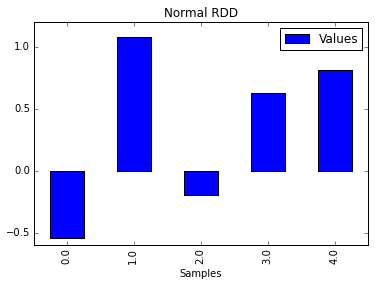

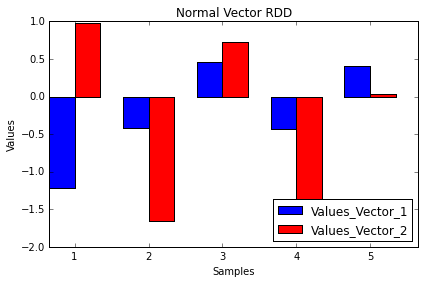

In [1]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
from __future__ import print_function


import sys


import pandas as pd
import numpy as np
from pyspark import SparkContext

from pyspark.mllib.random import RandomRDDs




# number of examples to generate
    
numExamples = 10000  
	
# fraction of data to sample
    
fraction = 0.1  

    
# Example: RandomRDDs.normalRDD
    
normalRDD = RandomRDDs.normalRDD(sc, numExamples)
    
# Creates data frame for visualization
dataFrame = pd.DataFrame(columns=('Samples', 'Values'))
print('Generated RDD of %d examples sampled from the standard normal distribution'% normalRDD.count())
    
print('  First 5 samples:')
    
sample = normalRDD.take(5)
for i in range(len(sample)): 
	dataFrame.loc[i] = [i,sample[i]]    
	print('    ' + str(sample[i]))

# 'Bar' plot is used here to visualize the normal RDD
dataFrame.plot('Samples', 'Values',color='blue', kind='bar', title = 'Normal RDD')

# Example: RandomRDDs.normalVectorRDD
    
normalVectorRDD = RandomRDDs.normalVectorRDD(sc, numRows=numExamples, numCols=2)
    
print('Generated RDD of %d examples of length-2 vectors.' % normalVectorRDD.count())
    
print('  First 5 samples:')
    
sampleVectorRDD = normalVectorRDD.take(5)
for i in range(len(sampleVectorRDD)):
	print('    ' + str(sampleVectorRDD[i]))
 

# Creates data frame for vector RDD
dataFrame = pd.DataFrame(sampleVectorRDD, columns = ('samples_vector1', 'samples_vector2'))
fig, ax = plt.subplots()
index = np.arange(len(dataFrame.index))
bar_width = 0.35

# Creates two bar plots (as subplots) to visualize the vector RDD
bar_Vector1 = plt.bar(index, dataFrame['samples_vector1'], bar_width , color='blue', label='Values_Vector_1')
bar_Vector2 = plt.bar(index + bar_width, dataFrame['samples_vector2'], 0.35 , color='red',  label='Values_Vector_2')

plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Normal Vector RDD')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5'))
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


